In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
df= pd.read_csv('/content/Cost_of_Living_Index_2022 - Cost_of_Living_Index_2022.csv')

In [4]:
print(df.head())

   Rank      Country  Cost of Living Index  Rent Index  \
0     1  Afghanistan                 20.37        2.72   
1     2      Albania                 35.50        8.47   
2     3      Algeria                 26.87        4.59   
3     4    Argentina                 34.69        7.71   
4     5      Armenia                 33.89       11.61   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                           12.09            14.92                   12.41   
1                           22.83            29.32                   25.82   
2                           16.43            28.82                   14.48   
3                           22.04            28.17                   33.32   
4                           23.45            27.59                   30.55   

   Local Purchasing Power Index  
0                         23.04  
1                         30.19  
2                         24.63  
3                         30.72  
4           

In [8]:
!pip install --quiet pandas matplotlib seaborn statsmodels scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

print("Missing values:\n", df.isna().sum())
print("\nSummary stats:\n", df.describe())

Missing values:
 Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

Summary stats:
              Rank  Cost of Living Index  Rent Index  \
count  139.000000            139.000000  139.000000   
mean    70.000000             50.188633   19.291511   
std     40.269923             20.860222   15.317726   
min      1.000000             19.920000    2.720000   
25%     35.500000             34.715000    9.515000   
50%     70.000000             44.680000   13.930000   
75%    104.500000             62.580000   25.070000   
max    139.000000            146.040000   98.580000   

       Cost of Living Plus Rent Index  Groceries Index  \
count                      139.000000       139.000000   
mean                        35.705324        46.63784

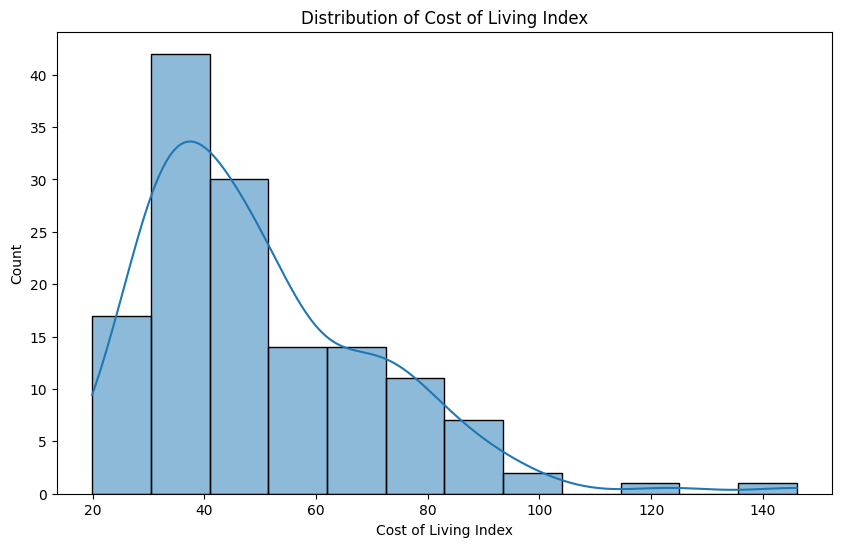

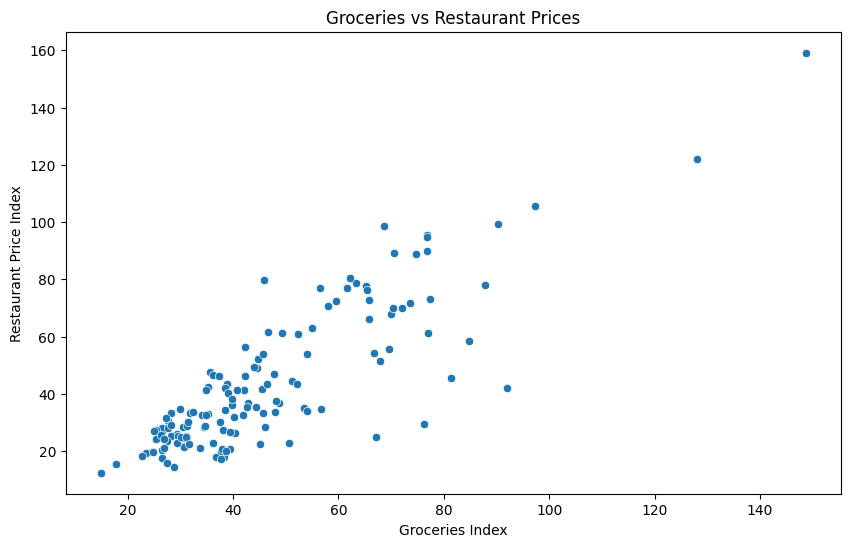

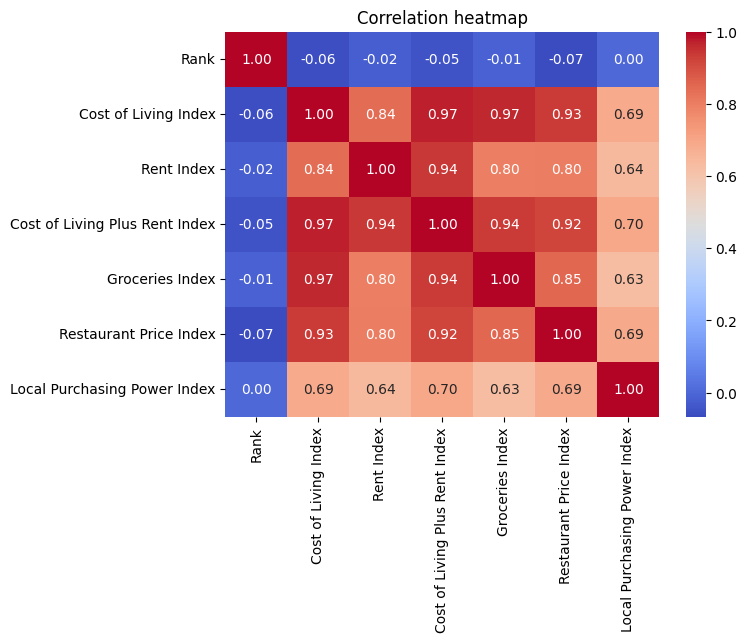

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df["Cost of Living Index"], kde=True)
plt.title("Distribution of Cost of Living Index")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x="Groceries Index", y="Restaurant Price Index", data=df)
plt.title("Groceries vs Restaurant Prices")
plt.show()

corr = df[num_cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

Coefficients:
Rent Index                    : 0.069
Groceries Index               : 0.589
Restaurant Price Index        : 0.311
Local Purchasing Power Index  : 0.022
Intercept: 6.872891901184481


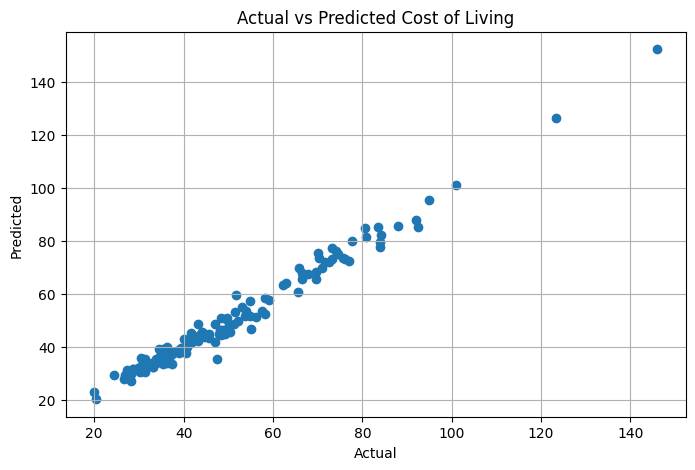

In [11]:
X = df[["Rent Index", "Groceries Index", "Restaurant Price Index", "Local Purchasing Power Index"]]
y = df["Cost of Living Index"]

model = LinearRegression()
model.fit(X, y)

print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col:30s}: {coef:.3f}")
print("Intercept:", model.intercept_)

pred = model.predict(X)
plt.figure(figsize=(8,5))
plt.scatter(y, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Cost of Living")
plt.grid(True)
plt.show()

/tmp/ipython-input-1214312738.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Date'] = pd.date_range(start='2022-01-01', periods=len(data), freq='M')


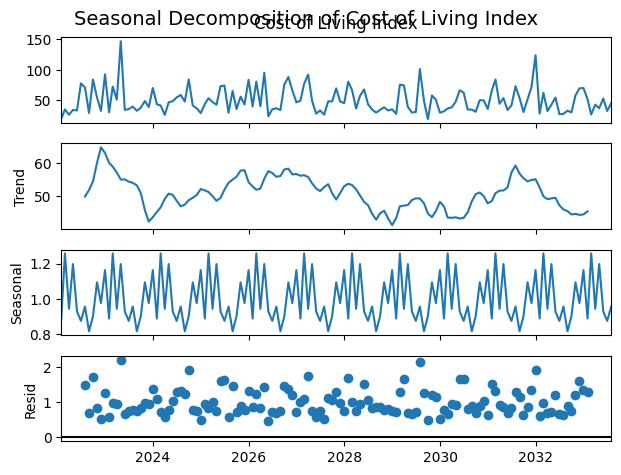

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Cost of Living Index   No. Observations:                  139
Model:                   ARIMA(5, 1, 0)   Log Likelihood                -626.903
Date:                  Fri, 31 Oct 2025   AIC                           1265.807
Time:                          13:18:40   BIC                           1283.370
Sample:                      01-31-2022   HQIC                          1272.944
                           - 07-31-2033                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7604      0.076    -10.055      0.000      -0.909      -0.612
ar.L2         -0.5496      0.107     -5.158      0.000      -0.758      -0.341
ar.L3         -0.4957      0.118    

/tmp/ipython-input-1214312738.py:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:],


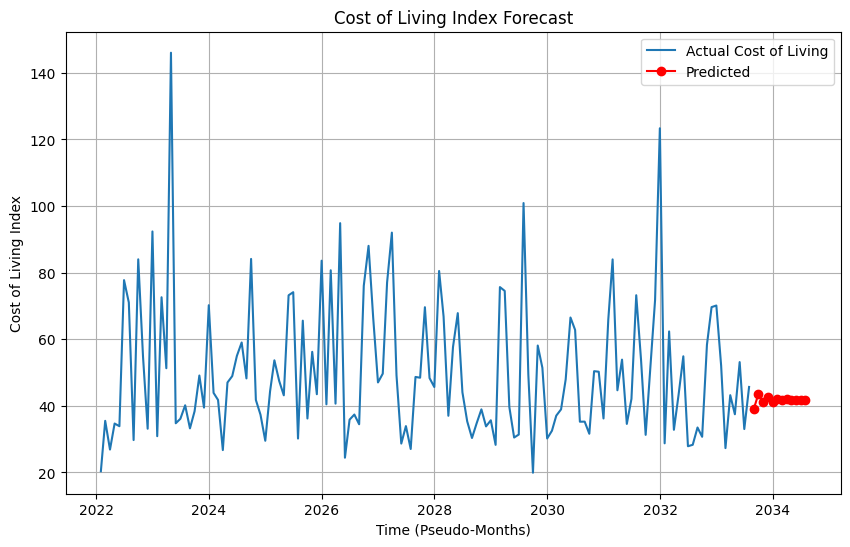

Mean Squared Error (last 12 vs forecast): 217.50


In [13]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# --- Load your dataset ---
df = pd.read_csv('/content/Cost_of_Living_Index_2022 - Cost_of_Living_Index_2022.csv')
df.columns = [c.strip() for c in df.columns]

# --- Clean numeric columns ---
num_cols = ['Cost of Living Index','Rent Index','Cost of Living Plus Rent Index',
            'Groceries Index','Restaurant Price Index','Local Purchasing Power Index']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# --- Sort by rank to simulate time (acts like months) ---
data = df.sort_values('Rank').reset_index(drop=True)

# --- Create a pseudo 'Date' index (monthly style just for plotting) ---
data['Date'] = pd.date_range(start='2022-01-01', periods=len(data), freq='M')
data.set_index('Date', inplace=True)

# --- Seasonal decomposition on Cost of Living Index ---
decomposition = seasonal_decompose(data['Cost of Living Index'], model='multiplicative', period=12)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Cost of Living Index', fontsize=14)
plt.show()

# --- Fit ARIMA model ---
model = ARIMA(data['Cost of Living Index'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

# --- Forecast next 12 periods ---
forecast_steps = 12
predictions = model_fit.forecast(steps=forecast_steps)

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(10,6))
plt.plot(data['Cost of Living Index'], label='Actual Cost of Living')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:],
         predictions, label='Predicted', color='red', marker='o')
plt.title('Cost of Living Index Forecast')
plt.xlabel('Time (Pseudo-Months)')
plt.ylabel('Cost of Living Index')
plt.legend()
plt.grid(True)
plt.show()

# --- Evaluate the model (optional approximation) ---
# Using last 12 observed vs forecast
if len(data) > 12:
    mse = mean_squared_error(data['Cost of Living Index'][-12:], predictions[:12])
    print(f"Mean Squared Error (last 12 vs forecast): {mse:.2f}")
else:
    print("Not enough data to compute MSE accurately (need >12 rows).")


In [12]:
print("Quick Insights:")
print("- Average Cost of Living Index:", round(df['Cost of Living Index'].mean(),2))
print("- Country with highest cost of living:", df.loc[df['Cost of Living Index'].idxmax(),'Country'])
print("- Country with lowest cost of living:", df.loc[df['Cost of Living Index'].idxmin(),'Country'])
print("- Highest Local Purchasing Power:", df.loc[df['Local Purchasing Power Index'].idxmax(),'Country'])

Quick Insights:
- Average Cost of Living Index: 50.19
- Country with highest cost of living: Bermuda
- Country with lowest cost of living: Pakistan
- Highest Local Purchasing Power: Switzerland
